In [68]:
from matplotlib import pyplot as plt
from sklearn.datasets import load_digits
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score,
                             confusion_matrix, mean_absolute_error, mean_squared_error,
                             classification_report)

import numpy as np
import seaborn as sns
import pandas as pd

digits = load_digits(as_frame=True)

# **Primera Parte**

Procedemos a separar una tercera parte de los datos para servirlos a la hora de predecir los modelos mas tarde

In [69]:
X_train, x_test, Y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.33, random_state=42)

## **Regresión Logística**

In [77]:
model_regresionLogistica = LogisticRegression(max_iter=10000)

### Entrenamiento y predicción de resultados

In [78]:
model_regresionLogistica.fit(X_train, Y_train)
logisticaY_pred = model_regresionLogistica.predict(x_test)

### Resultados del modelo

<Axes: >

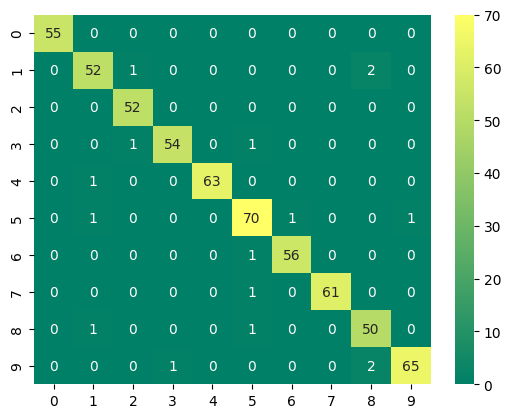

In [12]:
sns.heatmap(confusion_matrix(y_test, logisticaY_pred), annot=True, cmap="summer")

In [13]:
print("Classification report: \n", classification_report(y_test, logisticaY_pred))

Classification report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        55
           1       0.95      0.95      0.95        55
           2       0.96      1.00      0.98        52
           3       0.98      0.96      0.97        56
           4       1.00      0.98      0.99        64
           5       0.95      0.96      0.95        73
           6       0.98      0.98      0.98        57
           7       1.00      0.98      0.99        62
           8       0.93      0.96      0.94        52
           9       0.98      0.96      0.97        68

    accuracy                           0.97       594
   macro avg       0.97      0.97      0.97       594
weighted avg       0.97      0.97      0.97       594



- Puede que tenga una precisión alta debido a que el dataset tiene un valor lineal. 
- Al ser con poca resolución, hay menos variabilidad ya que partimos de menos pixeles de información, lo que ayuda a diferenciar mejor
- Las reglas de aprendizaje son sencillas

## **Perceptro**

In [70]:
from sklearn.linear_model import Perceptron

In [71]:
model_perceptron = Perceptron(random_state=42)

### Entrenamiento y predicción de los resultados

In [72]:
model_perceptron.fit(X_train, Y_train)
perc_yPred = model_perceptron.predict(x_test)

### Resultados del modelo

<Axes: >

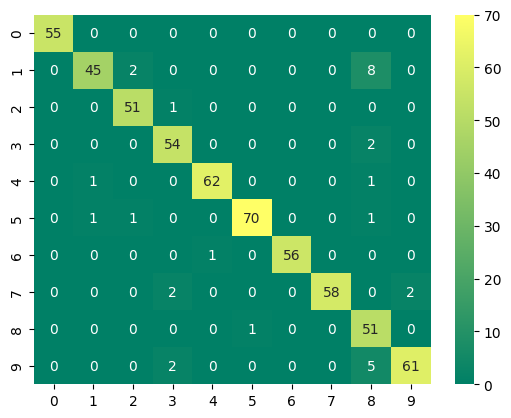

In [17]:
sns.heatmap(confusion_matrix(y_test, perc_yPred), annot=True, cmap="summer")

Como podemos observar, vemos que el modelo ha tenido dificultades confundiendo el 9 y el 1 en varias ocasiones con el 8.

A pesar de ello, vemos unos resultados constantes y no muy alarmantes.

In [18]:
print("Classification report: \n", classification_report(y_test, perc_yPred))

Classification report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        55
           1       0.96      0.82      0.88        55
           2       0.94      0.98      0.96        52
           3       0.92      0.96      0.94        56
           4       0.98      0.97      0.98        64
           5       0.99      0.96      0.97        73
           6       1.00      0.98      0.99        57
           7       1.00      0.94      0.97        62
           8       0.75      0.98      0.85        52
           9       0.97      0.90      0.93        68

    accuracy                           0.95       594
   macro avg       0.95      0.95      0.95       594
weighted avg       0.95      0.95      0.95       594



Podemos confirmar lo que estabamos diciendo anteriormente. Debido a estos fallos, el 8 ha tenido una precisión del **75%**

Aún así, la media global del modelo es bastante alta, con un **95%** de precisión

## **Decision Tree**

In [86]:
from sklearn.tree import DecisionTreeClassifier

In [87]:
model_decisionTree = DecisionTreeClassifier(random_state=42)

### Entrenamiento y predicción de los resultados

In [89]:
model_decisionTree.fit(X_train, Y_train)
decisionTree_ypred = model_decisionTree.predict(x_test)

### Resultados del modelo

<Axes: >

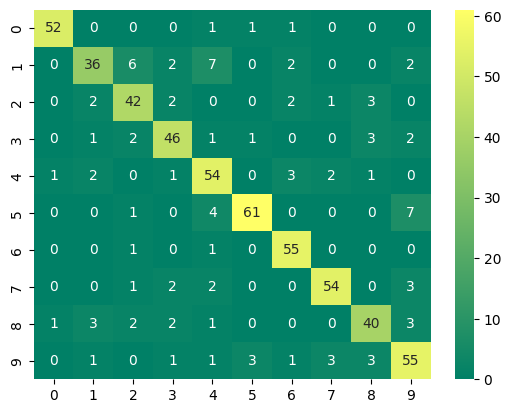

In [22]:
sns.heatmap(confusion_matrix(y_test, decisionTree_ypred), annot=True, cmap="summer")

En este modelo, podemos observar números más repartidos. Por ejemplo, destacamos el número 1, con el que ha confundido bastante con números como el 2, el 3 y el 4. También, les pasa lo mismo al 5, al 8 y al 9

Como podemos observar, este modelo no parece ser una buena opción

In [23]:
print("Classification report: \n", classification_report(y_test, decisionTree_ypred))

Classification report: 
               precision    recall  f1-score   support

           0       0.96      0.95      0.95        55
           1       0.80      0.65      0.72        55
           2       0.76      0.81      0.79        52
           3       0.82      0.82      0.82        56
           4       0.75      0.84      0.79        64
           5       0.92      0.84      0.88        73
           6       0.86      0.96      0.91        57
           7       0.90      0.87      0.89        62
           8       0.80      0.77      0.78        52
           9       0.76      0.81      0.79        68

    accuracy                           0.83       594
   macro avg       0.83      0.83      0.83       594
weighted avg       0.84      0.83      0.83       594



Gracias a estos datos, podemos confirmar lo dicho anteriormente. El número 1 es el que sale peor parado, con un **65%** de **recall**. Por otro lado, gracias a que el 9 tiene un número de muestras más elevado, su porcentaje ha sido menor **(81%)**.

La media de todos los resultados deja una precisión del **83%** para el **Decision Tree**, mucho más bajo a lo visto anteriormente.

## **Random Forest**

In [24]:
from sklearn.ensemble import RandomForestClassifier

In [25]:
model_randomForest = RandomForestClassifier(random_state = 42)

### Entreno y predicción de resultado

In [26]:
model_randomForest.fit(X_train, Y_train)
randomForest_ypred = model_randomForest.predict(x_test)

### Resultados del modelo

<Axes: >

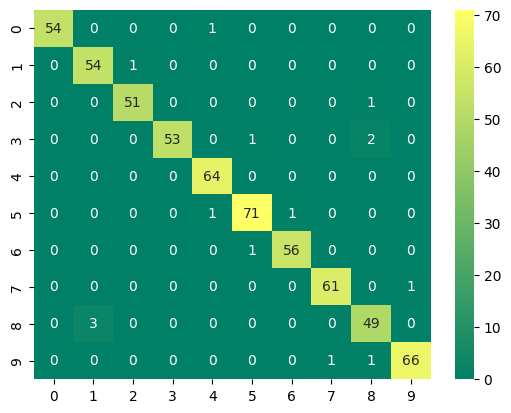

In [27]:
sns.heatmap(confusion_matrix(y_test, randomForest_ypred), annot=True, cmap="summer")

En este caso, vemos como los resultados de este modelo son estables, sin ninguna confusión destacable

In [28]:
print("Classification report: \n", classification_report(y_test, randomForest_ypred))

Classification report: 
               precision    recall  f1-score   support

           0       1.00      0.98      0.99        55
           1       0.95      0.98      0.96        55
           2       0.98      0.98      0.98        52
           3       1.00      0.95      0.97        56
           4       0.97      1.00      0.98        64
           5       0.97      0.97      0.97        73
           6       0.98      0.98      0.98        57
           7       0.98      0.98      0.98        62
           8       0.92      0.94      0.93        52
           9       0.99      0.97      0.98        68

    accuracy                           0.97       594
   macro avg       0.97      0.97      0.97       594
weighted avg       0.98      0.97      0.97       594



Se observa que el **Random Forest** tiene una precisión del **97%**

## **Comparativa Modelos**

In [29]:
comparativa = pd.DataFrame({
    'Nombre': ['Regresión Lineal', 'Perceptron', 'Decision Tree', 'Random Forest'],
    'Precision': [round(precision_score(y_test, logisticaY_pred, average='weighted'), 3), round(precision_score(y_test, perc_yPred, average='weighted'), 3), round(precision_score(y_test, decisionTree_ypred, average='weighted'), 3), round(precision_score(logisticaY_pred, randomForest_ypred, average='weighted'), 3)],
    'Recall': [round(recall_score(y_test, logisticaY_pred, average="weighted"), 3), round(recall_score(y_test, perc_yPred, average="weighted"), 3), round(recall_score(y_test, decisionTree_ypred, average="weighted"), 3), round(recall_score(logisticaY_pred, randomForest_ypred, average="weighted"), 3)],
    'F1': [round(f1_score(y_test, logisticaY_pred, average="weighted"), 3), round(f1_score(y_test, perc_yPred, average="weighted"), 3), round(f1_score(y_test, decisionTree_ypred, average="weighted"), 3), round(f1_score(logisticaY_pred, randomForest_ypred, average="weighted"), 3)],
    'Score': [round(accuracy_score(y_test, logisticaY_pred), 3), round(accuracy_score(y_test, perc_yPred), 3), round(accuracy_score(y_test, decisionTree_ypred), 3), round(accuracy_score(logisticaY_pred, randomForest_ypred), 3)]
})

comparativa.sort_values(by="Precision", ascending=False)

,Nombre,Precision,Recall,F1,Score
0,Regresión Lineal,0.973,0.973,0.973,0.973
3,Random Forest,0.973,0.973,0.973,0.973
1,Perceptron,0.954,0.948,0.949,0.948
2,Decision Tree,0.836,0.833,0.833,0.833


Viendo los resultados, podemos confirmar que el **peor** modelo con este tipo de dataset es el **Decision Tree** con un **83.6%** alejandose considerablemente de los demás. Puede que un sobreajuste del árbol haya llevado a esta precisión "baja". Por otro lado, podemos observar que los modelos más adecuados para este dataset son los **lineales**, como la **Regresión lineal (97.3%) y el Perceptron (95.4%)**.

También destaca el **Random Forest** con un **97.3%**. Pese a ser parecido al Decision Tree, vemos que se envuelve mejor debido a que sabe controlar mejor los sobreajustes.

# **Segunda Parte**

En la segunda fase, evaluaremos si hay disparidades utilizando un conjunto nuevo de datos UCI, mediante el entrenamiento con la base de datos previamente utilizada de sklearn.

In [79]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
optical_recognition_of_handwritten_digits = fetch_ucirepo(id=80) 


X_uci = optical_recognition_of_handwritten_digits.data.features.to_numpy() 
y_uci = optical_recognition_of_handwritten_digits.data.targets["class"].values


## **Regresión Logística**

### Prediccion de resultados

In [80]:
uciLinearY_pred = model_regresionLogistica.predict(X_uci)

c:\Users\alber\.conda\envs\ia2023\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


### Restultados de modelos

<Axes: >

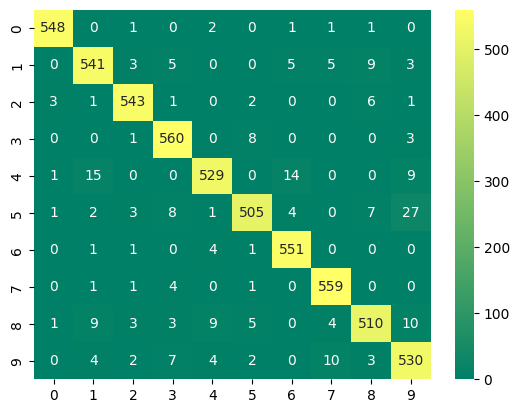

In [81]:
sns.heatmap(confusion_matrix(y_uci, uciLinearY_pred), annot=True, cmap="summer", fmt='g')

In [82]:
print("Classification report: \n", classification_report(y_uci, uciLinearY_pred))

Classification report: 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       554
           1       0.94      0.95      0.94       571
           2       0.97      0.97      0.97       557
           3       0.95      0.98      0.97       572
           4       0.96      0.93      0.95       568
           5       0.96      0.91      0.93       558
           6       0.96      0.99      0.97       558
           7       0.97      0.99      0.98       566
           8       0.95      0.92      0.94       554
           9       0.91      0.94      0.93       562

    accuracy                           0.96      5620
   macro avg       0.96      0.96      0.96      5620
weighted avg       0.96      0.96      0.96      5620



### Comparación con el dataset anterior

In [83]:
comparativa = pd.DataFrame({
    'Nombre': ['Dataset sklearn', 'Dataset uci'],
    'Precision': [round(precision_score(y_test, logisticaY_pred, average='weighted'), 3), round(precision_score(y_uci, uciLinearY_pred, average='weighted'), 3)],
    'Recall': [round(recall_score(y_test, logisticaY_pred, average="weighted"), 3), round(recall_score(y_uci, uciLinearY_pred, average="weighted"), 3)],
    'F1': [round(f1_score(y_test, logisticaY_pred, average="weighted"), 3), round(f1_score(y_uci, uciLinearY_pred, average="weighted"), 3)],
    'Score': [round(accuracy_score(y_test, logisticaY_pred), 3), round(accuracy_score(y_uci, uciLinearY_pred), 3)]
})

comparativa.sort_values(by="Precision", ascending=False)

,Nombre,Precision,Recall,F1,Score
0,Dataset sklearn,0.973,0.973,0.973,0.973
1,Dataset uci,0.957,0.957,0.956,0.957


No se ven diferencias notables entre los dos datasets

## **Perceptron**

### Prediccion de resultados

In [73]:
ucipercY_pred = model_perceptron.predict(X_uci)

c:\Users\alber\.conda\envs\ia2023\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but Perceptron was fitted with feature names
  warnings.warn(


### Restultados de modelos

<Axes: >

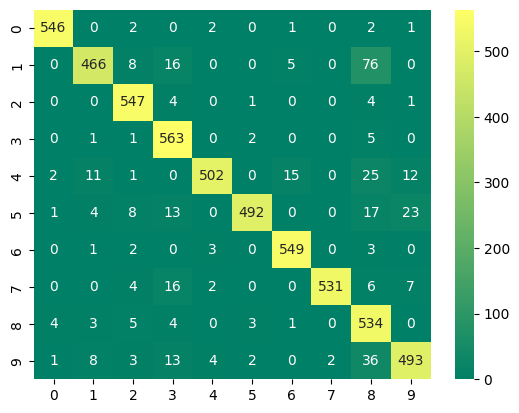

In [74]:
sns.heatmap(confusion_matrix(y_uci, ucipercY_pred), annot=True, cmap="summer", fmt='g')

In [75]:
print("Classification report: \n", classification_report(y_uci, ucipercY_pred))

Classification report: 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       554
           1       0.94      0.82      0.88       571
           2       0.94      0.98      0.96       557
           3       0.90      0.98      0.94       572
           4       0.98      0.88      0.93       568
           5       0.98      0.88      0.93       558
           6       0.96      0.98      0.97       558
           7       1.00      0.94      0.97       566
           8       0.75      0.96      0.85       554
           9       0.92      0.88      0.90       562

    accuracy                           0.93      5620
   macro avg       0.94      0.93      0.93      5620
weighted avg       0.94      0.93      0.93      5620



### Comparativa con el dataset anterior

In [76]:
comparativa = pd.DataFrame({
    'Nombre': ['Dataset sklearn', 'Dataset uci'],
    'Precision': [round(precision_score(y_test, perc_yPred, average='weighted'), 3), round(precision_score(y_uci, ucipercY_pred, average='weighted'), 3)],
    'Recall': [round(recall_score(y_test, perc_yPred, average="weighted"), 3), round(recall_score(y_uci, ucipercY_pred, average="weighted"), 3)],
    'F1': [round(f1_score(y_test, perc_yPred, average="weighted"), 3), round(f1_score(y_uci, ucipercY_pred, average="weighted"), 3)],
    'Score': [round(accuracy_score(y_test, perc_yPred), 3), round(accuracy_score(y_uci, ucipercY_pred), 3)]
})

comparativa.sort_values(by="Precision", ascending=False)

,Nombre,Precision,Recall,F1,Score
0,Dataset sklearn,0.954,0.948,0.949,0.948
1,Dataset uci,0.936,0.929,0.930,0.929


No se ven diferencias notables entre los dos datasets

## **Decision Tree**

### Prediccion de resultados

In [91]:
ucidecisiontreeY_pred = model_decisionTree.predict(X_uci)

c:\Users\alber\.conda\envs\ia2023\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


### Restultados de modelos

<Axes: >

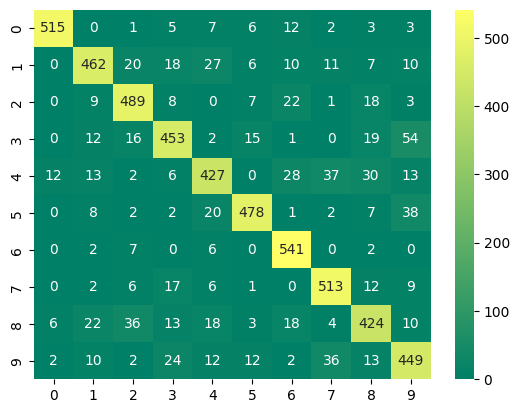

In [92]:
sns.heatmap(confusion_matrix(y_uci, ucidecisiontreeY_pred), annot=True, cmap="summer", fmt='g')

In [93]:
print("Classification report: \n", classification_report(y_uci, ucidecisiontreeY_pred))

Classification report: 
               precision    recall  f1-score   support

           0       0.96      0.93      0.95       554
           1       0.86      0.81      0.83       571
           2       0.84      0.88      0.86       557
           3       0.83      0.79      0.81       572
           4       0.81      0.75      0.78       568
           5       0.91      0.86      0.88       558
           6       0.85      0.97      0.91       558
           7       0.85      0.91      0.88       566
           8       0.79      0.77      0.78       554
           9       0.76      0.80      0.78       562

    accuracy                           0.85      5620
   macro avg       0.85      0.85      0.85      5620
weighted avg       0.85      0.85      0.84      5620



### Comparación con el dataset anterior

In [94]:
comparativa = pd.DataFrame({
    'Nombre': ['Dataset sklearn', 'Dataset uci'],
    'Precision': [round(precision_score(y_test, decisionTree_ypred, average='weighted'), 3), round(precision_score(y_uci, ucidecisiontreeY_pred, average='weighted'), 3)],
    'Recall': [round(recall_score(y_test, decisionTree_ypred, average="weighted"), 3), round(recall_score(y_uci, ucidecisiontreeY_pred, average="weighted"), 3)],
    'F1': [round(f1_score(y_test, decisionTree_ypred, average="weighted"), 3), round(f1_score(y_uci, ucidecisiontreeY_pred, average="weighted"), 3)],
    'Score': [round(accuracy_score(y_test, decisionTree_ypred), 3), round(accuracy_score(y_uci, ucidecisiontreeY_pred), 3)]
})

comparativa.sort_values(by="Precision", ascending=False)

,Nombre,Precision,Recall,F1,Score
1,Dataset uci,0.846,0.845,0.845,0.845
0,Dataset sklearn,0.836,0.833,0.833,0.833


## **Random Forest**

### Prediccion de resultados

In [43]:
ucirandomForestY_pred = model_randomForest.predict(X_uci)

c:\Users\alber\.conda\envs\ia2023\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


### Restultados de modelos

<Axes: >

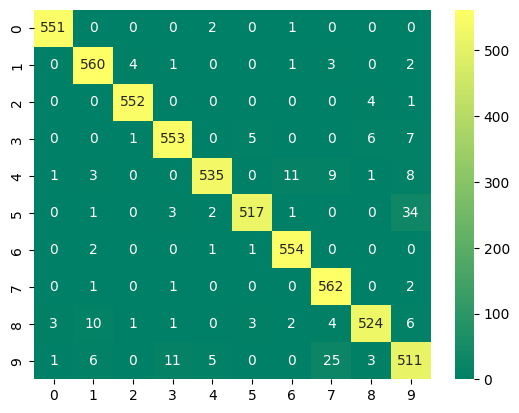

In [44]:
sns.heatmap(confusion_matrix(y_uci, ucirandomForestY_pred), annot=True, cmap="summer", fmt='g')

In [45]:
print("Classification report: \n", classification_report(y_uci, ucirandomForestY_pred))

Classification report: 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       554
           1       0.96      0.98      0.97       571
           2       0.99      0.99      0.99       557
           3       0.97      0.97      0.97       572
           4       0.98      0.94      0.96       568
           5       0.98      0.93      0.95       558
           6       0.97      0.99      0.98       558
           7       0.93      0.99      0.96       566
           8       0.97      0.95      0.96       554
           9       0.89      0.91      0.90       562

    accuracy                           0.96      5620
   macro avg       0.96      0.96      0.96      5620
weighted avg       0.96      0.96      0.96      5620



### Comparación con el dataset anterior

In [46]:
comparativa = pd.DataFrame({
    'Nombre': ['Dataset sklearn', 'Dataset uci'],
    'Precision': [round(precision_score(y_test, randomForest_ypred, average='weighted'), 3), round(precision_score(y_uci, ucirandomForestY_pred, average='weighted'), 3)],
    'Recall': [round(recall_score(y_test, randomForest_ypred, average="weighted"), 3), round(recall_score(y_uci, ucirandomForestY_pred, average="weighted"), 3)],
    'F1': [round(f1_score(y_test, randomForest_ypred, average="weighted"), 3), round(f1_score(y_uci, ucirandomForestY_pred, average="weighted"), 3)],
    'Score': [round(accuracy_score(y_test, randomForest_ypred), 3), round(accuracy_score(y_uci, ucirandomForestY_pred), 3)]
})

comparativa.sort_values(by="Precision", ascending=False)

,Nombre,Precision,Recall,F1,Score
0,Dataset sklearn,0.975,0.975,0.975,0.975
1,Dataset uci,0.965,0.964,0.964,0.964


## Cross-Validation

In [102]:
x_uci_train, x_uci_test, y_uci_train, y_uci_test = train_test_split(X_uci, y_uci, test_size=0.33, random_state=42)


In [103]:
parametros_logistica = {'C': [1e-3, 1e-2, 1e-1], 'solver' : ['lbfgs', 'liblinear', 'newton-cg']}
parametros_perceptron = {'alpha' :[1e-15, 1e-12, 1e-8]}
parametros_decision = {'max_depth': [None, 100, 1000], 'min_samples_split': [2, 3]}
parametros_random = {'n_estimators': [1000, 2000, 10000], 'max_depth': [100, 200], 'min_samples_split': [3, 4, 6]}

In [49]:
##parametros_lineal = {'tol':  [1e-8, 1e-5, 1e-2],'C': [1e-1, 1, 100], 'fit_intercept': [True, False], 'solver' : ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'], 'random_state': [30, 42, 60]}
##parametros_perceptron = {'alpha' :[0.001], 'tol': [1e-2, 1e-3, 1e-6],'C' : [1e-1, 29, 50], 'fit_intercept':[True,False], 'solver' : ['lbfgs', 'liblinear', 'newton-cg'], 'random_state': [2, 22, 45]}
##parametros_decision = {'criterion': ['gini', 'entropy', 'log_loss'], 'splitter': ['best', 'random'], 'max_depth': [None, 10, 100], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'max_features': ['auto', 'sqrt', 'log2', 100, 20], 'random_state': [30, 42, 60]}
#parametros_random = {'n_estimators': [100, 200, 300], 'criterion': ['gini', 'entropy', 'log_loss'], 'max_depth': [None, 10, 100], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'max_features': ['auto', 'sqrt', 'log2', 100, 20], 'random_state': [30, 42, 60]}

In [104]:
from sklearn.model_selection import GridSearchCV

gridSearch_logistic = GridSearchCV(model_regresionLogistica, parametros_logistica, cv=5)
gridSearch_perceptron = GridSearchCV(model_perceptron, parametros_perceptron, cv=5)
gridSearch_decision = GridSearchCV(model_decisionTree, parametros_decision, cv=5)
gridSearch_random = GridSearchCV(model_randomForest, parametros_random, cv=5)

### Entrenamiento de resultados

In [105]:
gridSearch_logistic.fit(x_uci_train, y_uci_train)
gridSearch_perceptron.fit(x_uci_train, y_uci_train)
gridSearch_decision.fit(x_uci_train, y_uci_train)
gridSearch_random.fit(x_uci_train, y_uci_train)

KeyboardInterrupt: 

In [98]:
best_params_log_logistic = gridSearch_logistic.best_params_
best_params_log_logistic
#best_params_log_perceptron = gridSearch_perceptron.best_params_
#best_params_log_perceptron
#best_params_log_decision = gridSearch_decision.best_params_
#best_params_log_decision
#best_params_log_random = gridSearch_random.best_params_
#best_params_log_random

{'C': 0.01, 'solver': 'lbfgs'}